In [1]:
# Import libraries that'll be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import h5py
import math
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
plt.rc('axes.formatter', useoffset = False)
plt.rc('text', usetex = True)
plt.rc('font', style  = 'normal')
plt.rc('font', **{'family': 'Times New Roman'})
ticksize = 5
plt.rc('xtick.major', size = ticksize);  plt.rc('ytick.major', size = ticksize)

In [2]:
print("Current working directory:", os.getcwd())

Current working directory: /Users/bxiao/Research/Quantum_Computing/Holographic_Quantum_Algorithms


In [3]:
goldenRatio = (5**.5 - 1) / 2.

### Analyze local observable e.g. $S_{z}$, spin correlation function $C_{zz}$ and overlap of wavefunctions

In [4]:
file = h5py.File("Data/Long_Range_Gate_Test.h5", "r")

In [5]:
file.keys()

<KeysViewHDF5 ['Sx1', 'Sx2', 'Sy1', 'Sy2', 'Sz1', 'Sz2', 'overlap', 'overlap1', 'overlap2']>

(20,)
(20,)
(20,)


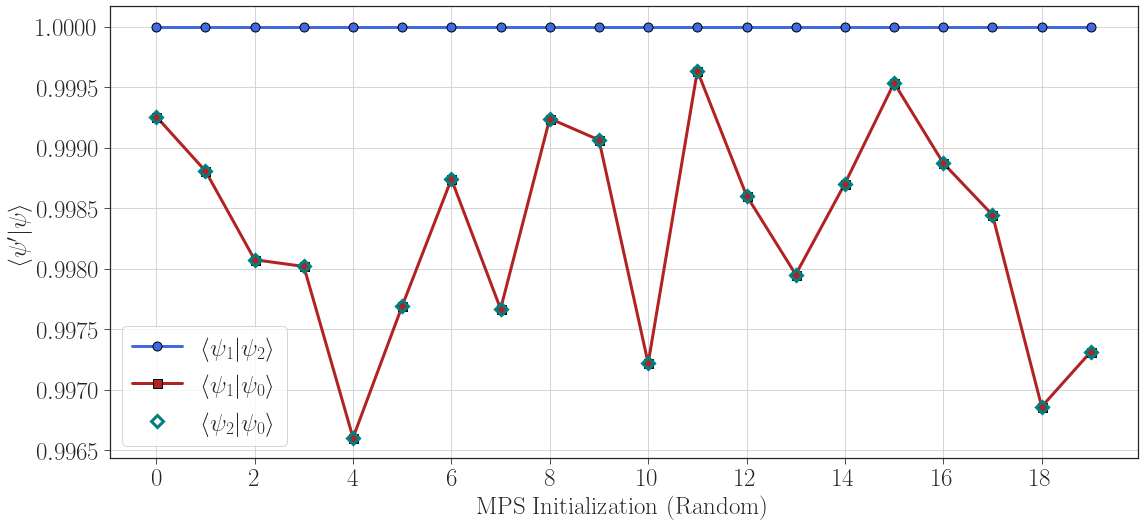

In [7]:
'''
    Plot the overlap of wavefunctions obtained by apply the long-range gate in two ways
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

ax1 = fig.add_subplot(spec[0, 0])
overlap  = np.array(file['overlap']); print(overlap.shape)
overlap1 = np.array(file['overlap1']); print(overlap1.shape)
overlap2 = np.array(file['overlap2']); print(overlap2.shape)

ax1.plot(np.arange(20), overlap,  linewidth = 3, color = 'royalblue', marker = 'o', markersize = 9, markeredgecolor = 'black', label = r'$\langle \psi_{1} | \psi_{2} \rangle$')
ax1.plot(np.arange(20), overlap1, linewidth = 3, color = 'firebrick', marker = 's', markersize = 9, markeredgecolor = 'black', label = r'$\langle \psi_{1} | \psi_{0} \rangle$')
ax1.plot(np.arange(20), overlap2, linewidth = 3, linestyle = '', marker = 'D', markersize = 9, markeredgewidth = 3, markeredgecolor = 'teal', markerfacecolor = 'none', label = r'$\langle \psi_{2} | \psi_{0} \rangle$')

ax1.set_xlabel(r'$\rm MPS \; Initialization \; (Random)$', fontsize = 25)
ax1.set_ylabel(r'$\langle \psi^{\prime} | \psi \rangle$', fontsize = 25)
ax1.set_xticks(np.arange(0, 20, 2))
ax1.tick_params(axis = "both", which = "major", labelsize = 25)
ax1.grid()
ax1.legend(frameon = True, fontsize = 25)
# plt.savefig('Figures/Long_Range_Two_Site_Check_Wavefunction_Overlap.pdf')

(50, 20)
(50, 20)
(50, 20)


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python

Text(0.5, 0, '$\\rm MPS\\; Initialization$')

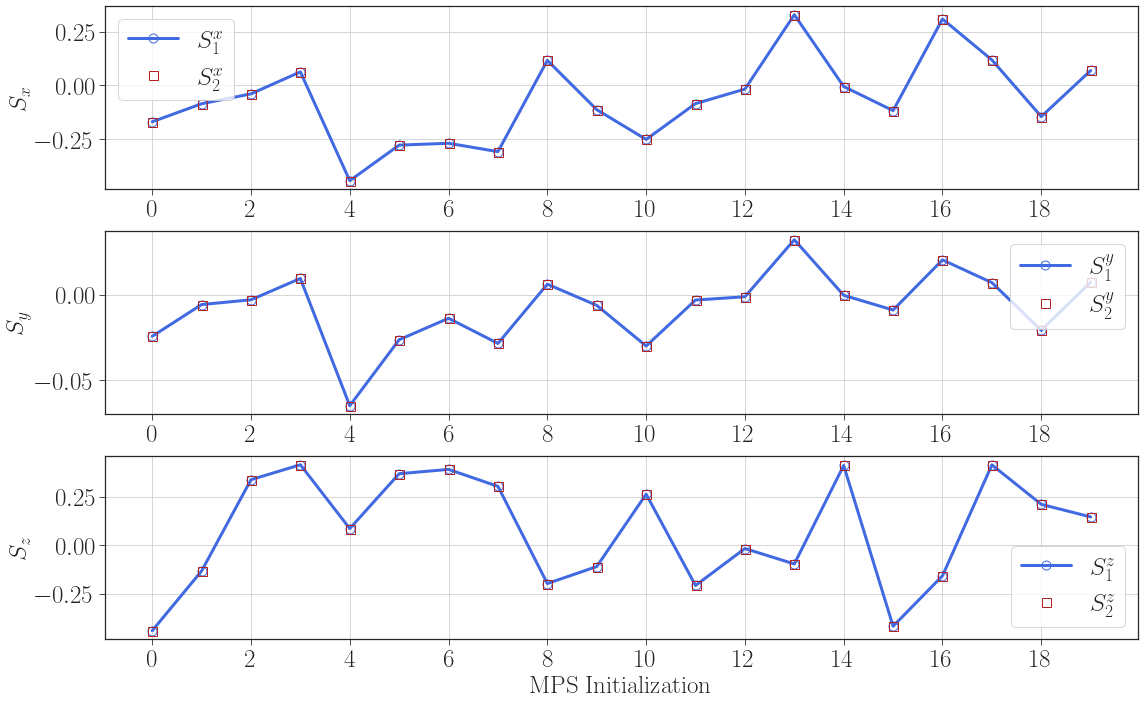

In [8]:
'''
    Plot the overlap of wavefunctions obtained by apply the long-range gate in two ways
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 3, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

tags = [['Sx1', 'Sx2'], ['Sy1', 'Sy2'], ['Sz1', 'Sz2']]
labels = [[r'$S^{x}_{1}$', r'$S^{x}_{2}$'], [r'$S^{y}_{1}$', r'$S^{y}_{2}$'], [r'$S^{z}_{1}$', r'$S^{z}_{2}$']]
ylabels = [r'$S_{x}$', r'$S_{y}$', r'$S_{z}$']

for ind in range(len(tags)):
    ax1 = fig.add_subplot(spec[ind, 0])
    tmp1, tmp2 = np.array(file[tags[ind][0]]), np.array(file[tags[ind][1]]); print(tmp1.shape)
    ax1.plot(np.arange(20), tmp1[0, :],  linewidth = 3, color = 'royalblue', marker = 'o', markersize = 9, \
             markeredgecolor = 'royalblue', markerfacecolor = 'none', label = labels[ind][0])
    ax1.plot(np.arange(20), tmp2[0, :], linestyle = " ", linewidth = 3, color = 'firebrick', marker = 's', markersize = 9, \
             markeredgecolor = 'firebrick', markerfacecolor = 'none', label = labels[ind][1]) 
    ax1.set_ylabel(ylabels[ind], fontsize = 25)
    ax1.set_xticks(np.arange(0, 20, 2))
    ax1.tick_params(axis = "both", which = "major", labelsize = 25)
    ax1.legend(frameon = True, fontsize = 25)
    ax1.grid()
ax1.set_xlabel(r'$\rm MPS\; Initialization$', fontsize = 25)

# plt.savefig('Figures/Long_Range_Two_Site_Check_Spin_Components.pdf')

In [9]:
file = h5py.File("Data/Long_Range_Gate_Test_Time_Series_AF.h5", "r")

In [10]:
file.keys()

<KeysViewHDF5 ['Sx1', 'Sx2', 'Sy1', 'Sy2', 'Sz1', 'Sz2', 'overlap', 'overlap1', 'overlap2']>

(20,)
(20,)
(20,)


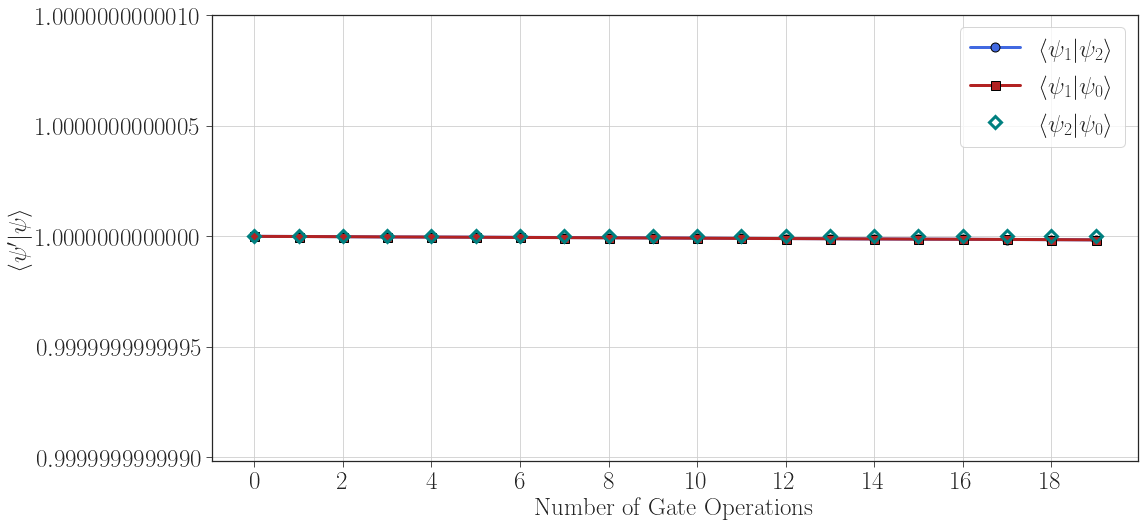

In [11]:
'''
    Plot the overlap of wavefunctions obtained by apply the long-range gate in two ways
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

ax1 = fig.add_subplot(spec[0, 0])
overlap  = np.array(file['overlap']); print(overlap.shape)
overlap1 = np.array(file['overlap1']); print(overlap1.shape)
overlap2 = np.array(file['overlap2']); print(overlap2.shape)

ax1.plot(np.arange(20), overlap,  linewidth = 3, color = 'royalblue', marker = 'o', markersize = 9, markeredgecolor = 'black', label = r'$\langle \psi_{1} | \psi_{2} \rangle$')
ax1.plot(np.arange(20), overlap1, linewidth = 3, color = 'firebrick', marker = 's', markersize = 9, markeredgecolor = 'black', label = r'$\langle \psi_{1} | \psi_{0} \rangle$')
ax1.plot(np.arange(20), overlap2, linewidth = 3, linestyle = '', marker = 'D', markersize = 9, markeredgewidth = 3, markeredgecolor = 'teal', markerfacecolor = 'none', label = r'$\langle \psi_{2} | \psi_{0} \rangle$')

ax1.set_xlabel(r'$\rm Number\; of\; Gate\; Operations$', fontsize = 25)
ax1.set_ylabel(r'$\langle \psi^{\prime} | \psi \rangle$', fontsize = 25)
ax1.set_xticks(np.arange(0, 20, 2))
ax1.tick_params(axis = "both", which = "major", labelsize = 25)
ax1.grid()
ax1.legend(frameon = True, fontsize = 25)

# plt.savefig('Figures/Long_Range_Two_Site_Check_Wavefunction_Overlap_Time_Series_AF.pdf')

(50, 20)
(50, 20)
(50, 20)


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python

Text(0.5, 0, '$\\rm Number\\; of\\; Gate\\; Operation$')

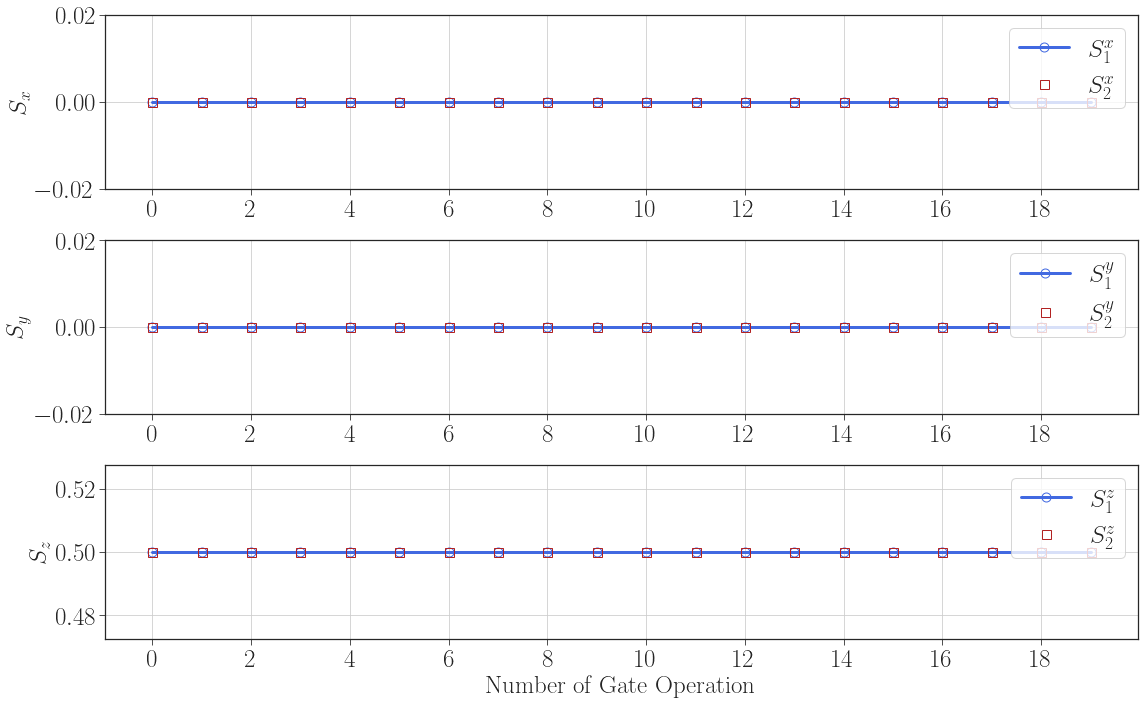

In [12]:
'''
    Plot the overlap of wavefunctions obtained by apply the long-range gate in two ways
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 3, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

tags = [['Sx1', 'Sx2'], ['Sy1', 'Sy2'], ['Sz1', 'Sz2']]
labels = [[r'$S^{x}_{1}$', r'$S^{x}_{2}$'], [r'$S^{y}_{1}$', r'$S^{y}_{2}$'], [r'$S^{z}_{1}$', r'$S^{z}_{2}$']]
ylabels = [r'$S_{x}$', r'$S_{y}$', r'$S_{z}$']

for ind in range(len(tags)):
    ax1 = fig.add_subplot(spec[ind, 0])
    tmp1, tmp2 = np.array(file[tags[ind][0]]), np.array(file[tags[ind][1]]); print(tmp1.shape)
    ax1.plot(np.arange(20), tmp1[0, :],  linewidth = 3, color = 'royalblue', marker = 'o', markersize = 9, \
             markeredgecolor = 'royalblue', markerfacecolor = 'none', label = labels[ind][0])
    ax1.plot(np.arange(20), tmp2[0, :], linestyle = " ", linewidth = 3, color = 'firebrick', marker = 's', markersize = 9, \
             markeredgecolor = 'firebrick', markerfacecolor = 'none', label = labels[ind][1]) 
    if ind != 2:
        ax1.set_ylim(-0.02, 0.02)
    ax1.set_ylabel(ylabels[ind], fontsize = 25)
    ax1.set_xticks(np.arange(0, 20, 2))
    ax1.tick_params(axis = "both", which = "major", labelsize = 25)
    ax1.legend(frameon = True, fontsize = 25)
    ax1.grid()

ax1.set_xlabel(r'$\rm Number\; of\; Gate\; Operation$', fontsize = 25)

# plt.savefig('Figures/Long_Range_Two_Site_Check_Spin_Components_Time_Series_AF.pdf')

In [4]:
file = h5py.File("Data/Sample_Test_Random_L100_Chi32.h5", "r")

In [5]:
file.keys()

<KeysViewHDF5 ['Sz', 'entropy']>

In [6]:
print(np.array(file['entropy']))

[[1.15071134 0.61289956 1.31475808 0.66804391 1.27957788 0.63831619
  1.30564017 0.67057174]
 [1.53293263 0.70326845 1.92701883 0.8185236  1.81779851 0.76395717
  1.87548846 0.81222285]
 [1.70352484 0.74352236 2.15986475 0.87575179 2.22543718 0.85911539
  2.35021465 0.93022881]
 [2.13476848 0.84545299 2.51357099 0.96268461 2.42876874 0.90658064
  2.50016613 0.96750328]
 [2.35214618 0.89670204 2.90956754 1.06001158 2.71379261 0.97311595
  2.38263547 0.93828787]
 [2.69378627 0.97740255 2.92967042 1.06495242 2.59437115 0.94523848
  2.50155592 0.96784875]
 [2.88418695 1.02234428 2.80874703 1.0352322  2.7097507  0.97217242
  2.54306881 0.97816789]
 [2.98552377 1.0460426  2.82537917 1.03931992 2.6233318  0.95199899
  2.47361779 0.96090397]
 [2.85748114 1.01554682 2.78785292 1.03009712 2.87401295 1.01051741
  2.39989305 0.94257771]
 [2.83594854 1.01065528 2.65920361 0.99847794 2.86471568 1.00834708
  2.41228491 0.94565804]
 [2.77312064 0.99543022 2.86080082 1.04802543 2.77043195 0.98633771
  

(100, 8)


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python

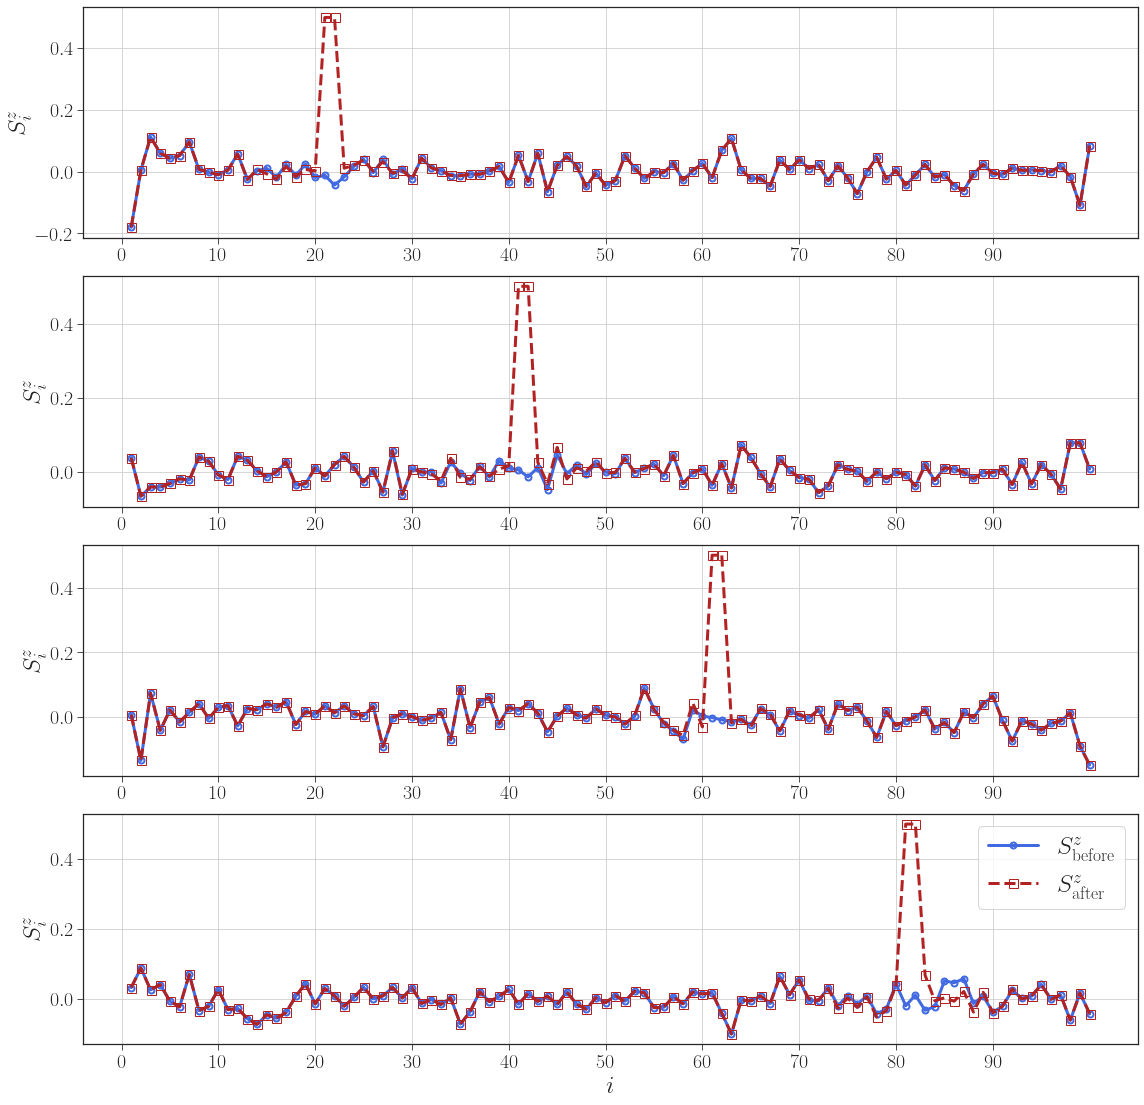

In [9]:
'''
    Plot the overlap of wavefunctions obtained by apply the long-range gate in two ways
'''

fig = plt.figure(figsize = (16, 25 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 4, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

Sz = np.array(file['Sz']); print(Sz.shape) 

for ind in range(4):
    ax1 = fig.add_subplot(spec[ind, 0])
    ax1.plot(np.arange(1, 101), Sz[:, 2 * ind],  linewidth = 3, color = 'royalblue', marker = 'o', markersize = 6, \
             markeredgecolor = 'royalblue', markerfacecolor = 'none', markeredgewidth = 2, label = r'$S_{\rm before}^{z}$')
    ax1.plot(np.arange(1, 101), Sz[:, 2 * ind + 1], linestyle = "--", linewidth = 3, color = 'firebrick', marker = 's', markersize = 9, \
             markeredgecolor = 'firebrick', markerfacecolor = 'none', markeredgewidth = 1, label = r'$S_{\rm after}^{z}$') 
    ax1.set_ylabel(r'$S_{i}^{z}$', fontsize = 25)
    ax1.set_xticks(np.arange(0, 100, 10))
    ax1.tick_params(axis = "both", which = "major", labelsize = 20)
    ax1.grid()
    
ax1.set_xlabel(r'$i$', fontsize = 25)
ax1.legend(frameon = True, fontsize = 25)

# plt.savefig('Figures/Sampling_Sz_Random.pdf')

(100, 8)


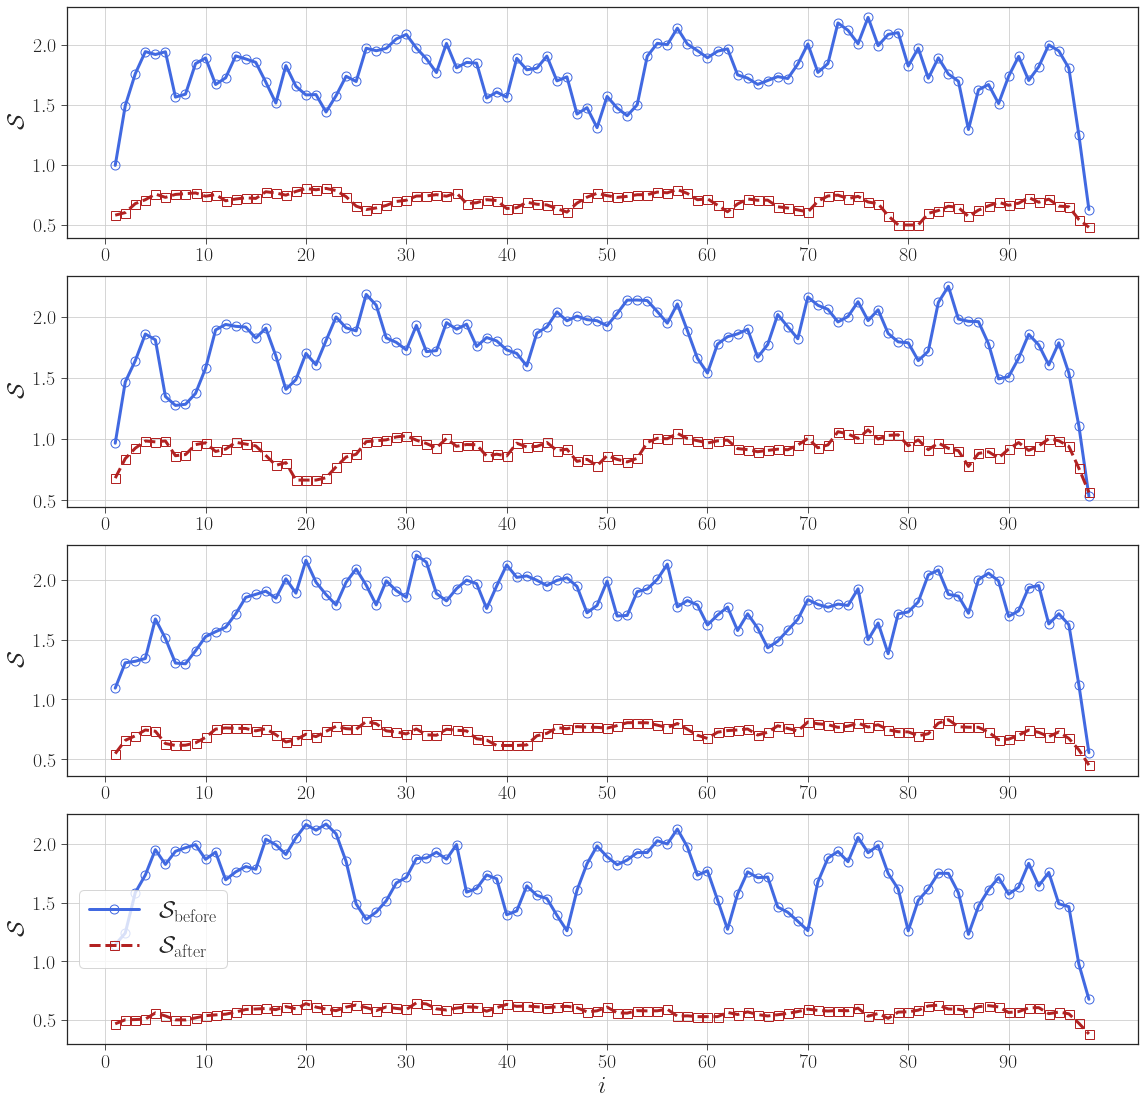

In [210]:
'''
    Plot the overlap of wavefunctions obtained by apply the long-range gate in two ways
'''

fig = plt.figure(figsize = (16, 25 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 4, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

entropy = np.array(file['entropy']); print(Sz.shape) 

for ind in range(4):
    ax1 = fig.add_subplot(spec[ind, 0])
    ax1.plot(np.arange(1, 99), entropy[:, 2 * ind],  linewidth = 3, color = 'royalblue', marker = 'o', markersize = 9, \
             markeredgecolor = 'royalblue', markerfacecolor = 'none', label = r'$\mathcal{S}_{\rm before}$')
    ax1.plot(np.arange(1, 99), entropy[:, 2 * ind - 1], linestyle = "--", linewidth = 3, color = 'firebrick', marker = 's', markersize = 9, \
             markeredgecolor = 'firebrick', markerfacecolor = 'none', label = r'$\mathcal{S}_{\rm after}$') 
    ax1.set_ylabel(r'$\mathcal{S}$', fontsize = 25)
    ax1.set_xticks(np.arange(0, 100, 10))
    ax1.tick_params(axis = "both", which = "major", labelsize = 20)
    ax1.grid()
    
ax1.set_xlabel(r'$i$', fontsize = 25)
ax1.legend(frameon = True, fontsize = 25)

# plt.savefig('Figures/Sampling_Sz_Random.pdf')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


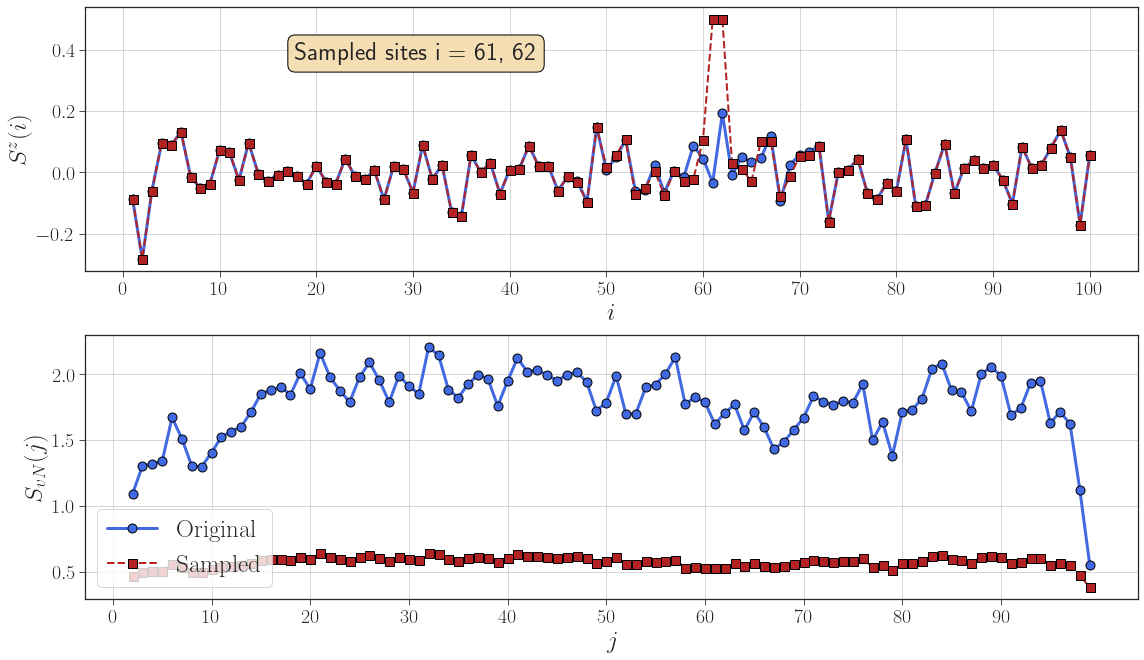

In [215]:
'''
    Plot the overlap of wavefunctions obtained by apply the long-range gate in two ways
'''

fig = plt.figure(figsize = (16, 15 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)
plt.style.use('seaborn-ticks')

# Sz = np.array(file['Sz']); print(Sz.shape) 
# entropy = np.array(file['entropy']); print(entropy.shape)

# Plot local observables e.g. Sz
ax1 = fig.add_subplot(spec[0, 0])
ax1.plot(np.arange(1, 101), Sz[:, 4],  linewidth = 3, color = 'royalblue', marker = 'o', markersize = 9, \
         markeredgecolor = 'black', label = r'$S_{\rm before}^{z}$')
ax1.plot(np.arange(1, 101), Sz[:, 5], linestyle = "--", linewidth = 2, color = 'firebrick', marker = 's', markersize = 9, \
         markeredgecolor = 'black', label = r'$S_{\rm after}^{z}$') 
ax1.text(0.2, 0.8, r'Sampled sites i = 61, 62', fontsize = 25, transform = ax1.transAxes, bbox = dict(facecolor = 'wheat', boxstyle = 'round', alpha = 1.0))
ax1.set_xlabel(r'$i$', fontsize = 25)
ax1.set_ylabel(r'$S^{z}(i)$', fontsize = 25)
ax1.set_xticks(np.arange(0, 101, 10))
ax1.tick_params(axis = "both", which = "major", labelsize = 20)
ax1.grid()

# Plot von Neumann entanglement entropy
ax1 = fig.add_subplot(spec[1, 0])
ax1.plot(np.arange(2, 100), entropy[:, 4],  linewidth = 3, color = 'royalblue', marker = 'o', markersize = 9, \
         markeredgecolor = 'black', label = r'$\rm Original$')
ax1.plot(np.arange(2, 100), entropy[:, 5], linestyle = "--", linewidth = 2, color = 'firebrick', marker = 's', markersize = 9, \
         markeredgecolor = 'black', label = r'$\rm Sampled$') 
# ax1.text(0.3, 0.5, r'Suppressed bonds j = 10, 11, 12', fontsize = 25, transform = ax1.transAxes, bbox = dict(facecolor = 'wheat', boxstyle = 'round', alpha = 1.0))
ax1.set_xlabel(r'$j$', fontsize = 25)
ax1.set_ylabel(r'$S_{vN}(j)$', fontsize = 25)
ax1.set_xticks(np.arange(0, 100, 10))
ax1.tick_params(axis = "both", which = "major", labelsize = 20)
ax1.grid()
ax1.legend(loc = 'lower left', frameon = True, fontsize = 25)

# plt.savefig('Figures/Sampling_Random_Sz_Entropy_lx=11.pdf')